In [13]:
import festim as F
import numpy as np
from festim2_solve_functions import *
from festim2_barrier_sweep_functions import *

In [14]:
T = 600  # K
P_up = 100 # Pa
barrier_thickness = 1e-3  # m
substrate_thickness = 1e-3  # m

results_folder = "results"

In [15]:
params = {
    "D_0_barrier": 1e-8,  # m2/s
    "E_D_barrier": 0.39,  # eV
    "S_0_barrier": 1e21,  # mol/m3Pa^0.5
    "E_S_barrier": 1,  # eV
    "K_r_0_barrier": 1e-18,  # m2/s Anderl 1992
    "E_K_r_barrier": 1,  # eV Anderl 1992
    "D_0_substrate": 1e-8,  # m2/s
    "E_D_substrate": 0.39,  # eV
    "S_0_substrate": 1e23,  # mol/m3Pa^0.5
    "E_S_substrate": 1,  # eV
    "K_r_0_substrate": 1e-18,  # m2/s
    "E_K_r_substrate": 1,  # converting to eV from F. WAELBROECK et al
}

my_model = F.HydrogenTransportProblemDiscontinuous()

create_mesh(my_model, barrier_thickness, substrate_thickness)

barrier, substrate, H = assign_materials_and_domains(my_model, params, barrier_thickness, substrate_thickness, T=T, P_up=P_up)

my_model.settings = F.Settings(
    atol=1e-0,
    rtol=1e-10,
    transient=False,
)

barrier_export, substrate_export = set_exports(my_model, barrier, substrate, H)

my_model.initialise()
my_model.run()

C1 = barrier_export.data[0][0]  # concentration at the left side of the barrier
Cm1 = barrier_export.data[0][-1]  # concentration at the right side of the barrier
Cm2 = substrate_export.data[0][0]  # concentration at the left side of the substrate
C2 = substrate_export.data[0][-1]  # concentration at the right side of the substrate
W, R = compute_W_R(params, barrier_thickness, substrate_thickness, T=T, P_up=P_up)

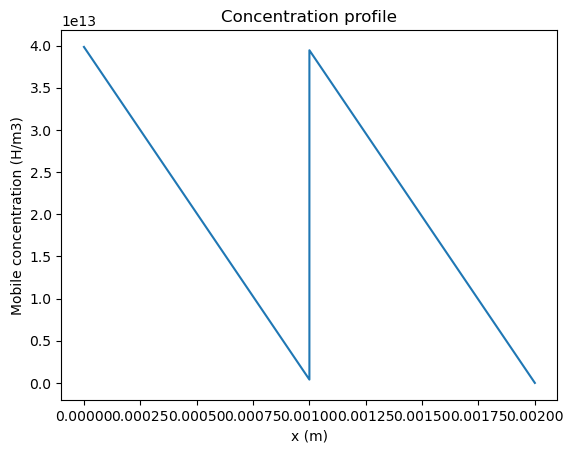

W = 4.79e-01, R = 1.00e+04
C1 = 3.98e+13, Cm1 = 3.94e+11, Cm2 = 3.94e+13, C2 = 0.00e+00
barrier regime: limiting
substrate regime: limiting
system regime: diffusion-limited


In [16]:
plot_concentration_profile(my_model, barrier_export, substrate_export)
print(f"W = {W:.2e}, R = {R:.2e}")

regime_barrier, regime_substrate, regime_system = determine_regime(C1, Cm1, Cm2, C2, tolerance=0.05)
print(f"C1 = {C1:.2e}, Cm1 = {Cm1:.2e}, Cm2 = {Cm2:.2e}, C2 = {C2:.2e}")
print("barrier regime:", regime_barrier)
print("substrate regime:", regime_substrate)
print("system regime:", regime_system)

params = {
    "D_0_barrier": 1e-8,  # m2/s
    "E_D_barrier": 0.39,  # eV
    "S_0_barrier": 1e21,  # mol/m3Pa^0.5
    "E_S_barrier": 1,  # eV
    "K_r_0_barrier": 1e-18,  # m2/s Anderl 1992
    "E_K_r_barrier": 1,  # eV Anderl 1992
    "D_0_substrate": 1e-8,  # m2/s
    "E_D_substrate": 0.39,  # eV
    "S_0_substrate": 1e21,  # mol/m3Pa^0.5
    "E_S_substrate": 1,  # eV
    "K_r_0_substrate": 1e-18,  # m2/s
    "E_K_r_substrate": 1,  # converting to eV from F. WAELBROECK et al
}

params = {
    "D_0_barrier": 1e-8,  # m2/s
    "E_D_barrier": 0.39,  # eV
    "S_0_barrier": 1e21,  # mol/m3Pa^0.5
    "E_S_barrier": 1,  # eV
    "K_r_0_barrier": 1e-18,  # m2/s Anderl 1992
    "E_K_r_barrier": 1,  # eV Anderl 1992
    "D_0_substrate": 1e-8,  # m2/s
    "E_D_substrate": 0.39,  # eV
    "S_0_substrate": 1e21,  # mol/m3Pa^0.5
    "E_S_substrate": 1,  # eV
    "K_r_0_substrate": 1e-18,  # m2/s
    "E_K_r_substrate": 1,  # converting to eV from F. WAELBROECK et al
}

W = 9.49e+01, R = 1.00e+00
C1 = 3.98e+13, Cm1 = 2.01e+13, Cm2 = 2.01e+13, C2 = 0.00e+00
barrier regime: limiting
substrate regime: limiting
system regime: diffusion-limited



W-

params = {
    "D_0_barrier": 1e-5,  # m2/s
    "D_0_substrate": 1e-5,  # m2/s
}

W = 9.49e-04, R = 1.00e+00
C1 = 3.98e+13, Cm1 = 1.99e+13, Cm2 = 1.99e+13, C2 = 0.00e+00
barrier regime: limiting
substrate regime: limiting
system regime: diffusion-limited



W+

params = {
    "D_0_barrier": 1e-11,  # m2/s
    "D_0_substrate": 1e-11,  # m2/s
}

params = {
    "D_0_barrier": 1e-8,  # m2/s
    "E_D_barrier": 0.39,  # eV
    "S_0_barrier": 1e21,  # mol/m3Pa^0.5
    "E_S_barrier": 1,  # eV
    "K_r_0_barrier": 1e-18,  # m2/s Anderl 1992
    "E_K_r_barrier": 1,  # eV Anderl 1992
    "D_0_substrate": 1e-8,  # m2/s
    "E_D_substrate": 0.39,  # eV
    "S_0_substrate": 1e21,  # mol/m3Pa^0.5
    "E_S_substrate": 1,  # eV
    "K_r_0_substrate": 1e-18,  # m2/s
    "E_K_r_substrate": 1,  # converting to eV from F. WAELBROECK et al
}

params = {
    "D_0_barrier": 1e-8,  # m2/s
    "E_D_barrier": 0.39,  # eV
    "S_0_barrier": 1e21,  # mol/m3Pa^0.5
    "E_S_barrier": 1,  # eV
    "K_r_0_barrier": 1e-18,  # m2/s Anderl 1992
    "E_K_r_barrier": 1,  # eV Anderl 1992
    "D_0_substrate": 1e-8,  # m2/s
    "E_D_substrate": 0.39,  # eV
    "S_0_substrate": 1e21,  # mol/m3Pa^0.5
    "E_S_substrate": 1,  # eV
    "K_r_0_substrate": 1e-18,  # m2/s
    "E_K_r_substrate": 1,  # converting to eV from F. WAELBROECK et al
}

W = 9.49e+01, R = 1.00e+00
C1 = 3.98e+13, Cm1 = 2.01e+13, Cm2 = 2.01e+13, C2 = 0.00e+00
barrier regime: limiting
substrate regime: limiting
system regime: diffusion-limited



W-

params = {
    "D_0_barrier": 1e-5,  # m2/s
    "D_0_substrate": 1e-5,  # m2/s
}

W = 9.49e-04, R = 1.00e+00
C1 = 3.98e+13, Cm1 = 1.99e+13, Cm2 = 1.99e+13, C2 = 0.00e+00
barrier regime: limiting
substrate regime: limiting
system regime: diffusion-limited



W+

params = {
    "D_0_barrier": 1e-11,  # m2/s
    "D_0_substrate": 1e-11,  # m2/s
}

S_0 variation - e19-e23